<a href="https://colab.research.google.com/github/cateto/python4NLP/blob/main/cohesion_test/%EB%AC%B8%EC%9E%A5%EC%9D%BC%EA%B4%80%EC%84%B1(%EC%9D%91%EC%A7%91%EC%84%B1)_%ED%8C%90%EB%8B%A8_%EB%B8%94%EB%A1%9C%EA%B7%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드 및 전처리

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
pip install kss==2.5.1

In [18]:
import pandas as pd

blog_data = pd.read_csv('/content/drive/MyDrive/rsn_nlp_project/blog.csv', encoding='utf-8')

In [19]:
blog_data

,Unnamed: 0,id,contents,category,tagging
0,0,BL000000009170838687,"불금 잘 보내고 계신가요? 저는 오늘도 하루종일 지방일정으로 바빴는데요, 이제 여유...",생활/음식,1
1,2,BL000000009170838685,반갑습니다 !! ㅎㅎ\n오늘은 굉장히 만족하면서 사용한 아우스 XML 6인용 4인용...,산업/유통/쇼핑/물류,0
2,4,BL000000009170838702,가정용식기세척기 SIEMENSSiemens 수입 임베디드 가정용 자동 식기 세척기 ...,산업/가전,0
3,6,BL000000009170838691,#당신의근황 #당근 \n\n​\n\n211001... 숫자가 너무 이상하다.\n\n...,생활/음식,1
4,7,BL000000009170838626,현재 스마트폰 터치펜 스타일러스 많이 찾는 소식 모아보기\n\n​\n진짜 유명한 상...,IT/과학/모바일,1
...,...,...,...,...,...
142,185,BL000000009173730086,1. 퇴촌갈비밥\n\n​\n\n점심식사 : 퇴촌 갈비초밥 + 직화 불 쭈꾸미 덮밥 ...,생활/음식,0
143,186,BL000000009173729895,귀한 창원월영마린애시앙 매물이\n\n귀한 전세로 나왔습니다.\n\n​\n\n집을 알...,사회/교육,1
144,187,BL000000009173729896,9.29\n아임프롬 라이스 마스크\n​\n\n​\n\n좋아하는 유튜버 이나언니의 아...,생활/음식,0
145,188,BL000000009173730079,​\n\n코로나가 터진 후에는 호캉스만 다니다가\n\n여행이 너무나도 가고 싶어진 ...,생활/음식,1


In [20]:
contents = blog_data

In [21]:
data_colname = 'contents'

contents[data_colname] = contents[data_colname].str.replace('\"', "",regex=True)
contents[data_colname] = contents[data_colname].str.replace("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+.[a-zA-Z0-9-.]+)", " ", regex=True) #이메일 주소에서 오는 유사도 차단
contents[data_colname] = contents[data_colname].str.replace("\n"," ")
contents[data_colname] = contents[data_colname].str.replace("\r"," ")
contents[data_colname] = contents[data_colname].str.replace("\t"," ")
contents[data_colname] = contents[data_colname].str.replace("\u200b","")

In [22]:
contents['contents'][0]

'불금 잘 보내고 계신가요? 저는 오늘도 하루종일 지방일정으로 바빴는데요, 이제 여유가 생겨 간단히 포스팅 하나 하고자 합니다. 말씀드릴 내용은 동료변호사들과 교대역 이여곰탕에 다녀온 이야기입니다.  곰탕 좋아하시나요?   이번 주는 수원보다는 서울에서 있는 시간이 더 많았던 것 같은데 그래서 서울 맛집들도 더불어 가게 되는듯 합니다. 여기는 예전에도 몇번이나 소개해드린 곰탕 맛집인데 간만에 생각나서 가게 됐습니다.      곰탕으로 셋다 주문을 했고 주문 후 약 30초만에 메뉴가 나왔습니다. 후후 불어가며 먹는데 역시 깊은 곰탕 국물이 인상 깊었습니다.      특히 맑은 국물이 신기한 곳인데 김치와 함께 먹다보면 더더욱 국물 맛에 녹아드는 것 같습니다. 믿고 추천할 만한 맛집인데 혹시나 여러분들께서도 교대역 오셨다가 곰탕이 드시고 싶으시면 이여곰탕에 가보시면 좋을 것 같습니다.     이여곰탕 본점  서울특별시 서초구 서초대로46길 19-15 이여빌딩'

# KSS 문장 분리 / 품사 한정 (명사, 동사, 형용사)

In [23]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-11-16 07:27:26--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=c4odh3BpguccMhsTkOtI%2Fr1gO1I%3D&Expires=1637

In [24]:
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-adktk1qe
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-adktk1qe


In [25]:
import tqdm
for i, temp in enumerate(blog_data['contents'][10:50]):
  try:
    result_blog_data = spell_checker.check(temp)
    blog_data['contents'][i] = result_blog_data.as_dict()['checked']
    print(result_blog_data.as_dict()['checked'])
  except:
    pass

In [26]:
from konlpy.tag import *
okt = Okt()

In [27]:
from kss import split_sentences

doc_result = []
doc_result_arr = []
for index, doc in enumerate(contents['contents']):
  sentences = split_sentences(doc)
  result_arr = []
  result = []
  for sentence in sentences:
    clean_words = []
    for word in okt.pos(sentence, stem=True):
      if word[1] in ['Noun', 'Verb', 'Adjective']: #명사, 동사, 형용사
        clean_words.append(word[0])
    temp_sentence = ' '.join(clean_words)
    result_arr.append(clean_words)
    result.append(temp_sentence)
  doc_result.append(result)
  doc_result_arr.append(result_arr)

In [28]:
doc_result_arr[:2]

[[['불금', '자다', '보내다', '계시다'],
  ['저', '오늘', '하루', '종일', '지방', '일정', '바쁘다'],
  ['이제', '여유', '생기다', '간단하다', '포스팅', '하나', '하다', '하다'],
  ['말씀드리다', '내용', '동료', '변호사', '교대역', '곰탕', '다녀오다', '이야기', '이다'],
  ['곰탕', '좋아하다'],
  ['이번',
   '주다',
   '수원',
   '서울',
   '있다',
   '시간',
   '더',
   '많다',
   '것',
   '같다',
   '서울',
   '맛집',
   '더불다',
   '가게',
   '되다',
   '하다'],
  ['여기다', '예전', '몇번', '소개', '해드리다', '곰탕', '맛집', '간만', '생각나다', '가게', '돼다'],
  ['곰탕', '셋', '주문', '하다', '주문', '후', '약', '메뉴', '나오다'],
  ['불다', '먹다', '역시', '깊다', '곰탕', '국물', '인상', '깊다'],
  ['맑은',
   '국물',
   '신기하다',
   '곳',
   '김치',
   '먹다',
   '보다',
   '더',
   '더욱',
   '국물',
   '맛',
   '녹다',
   '들다',
   '것',
   '같다'],
  ['믿다',
   '추천',
   '하다',
   '만',
   '맛집',
   '혹시',
   '여러분',
   '서도',
   '교대역',
   '오다',
   '곰탕',
   '들다',
   '싶다',
   '곰탕',
   '가보다',
   '좋다',
   '것',
   '같다'],
  ['곰탕', '본점', '서울특별시', '서초구', '서초대로', '길', '빌딩']],
 [['반갑다'],
  ['오늘',
   '굉장하다',
   '만족하다',
   '사용',
   '우스',
   '인용',
   '인용',
   '식탁',
   '세트',
   '모던',
  

In [31]:
contents['cos_sim'] = np.nan

# 상호 참조 관계(공통 단어 존재) 기반 국소적 응집성 계산

In [32]:
import numpy

all_coherence = []
for index, doc in enumerate(doc_result_arr):
  print(index)
  coherence = []
  if(len(doc)==1):
    continue
  for i, sentence in enumerate(doc):
    if(i==len(doc)-1): 
      break
    same_word = [x for x in doc[i] if x in doc[i+1]]
    # 입력 문장 - 문장 후보군 간  국소적 응집도 계산 후,
    print(doc[i], '와' ,doc[i+1], ' 의 상호 참조 관계 :', min(len(same_word),1))
    coherence.append(min(len(same_word),1))
  contents['cos_sim'][index] = numpy.mean(coherence)
  print('국소 응집성: ',numpy.mean(coherence))
  print('표준 편차: ',numpy.std(coherence))
  all_coherence.append(numpy.mean(coherence))
print('전체 평균 국소 응집성: ', numpy.mean(all_coherence))
print('표준 편차: ', numpy.std(all_coherence))

0
['불금', '자다', '보내다', '계시다'] 와 ['저', '오늘', '하루', '종일', '지방', '일정', '바쁘다']  의 상호 참조 관계 : 0
['저', '오늘', '하루', '종일', '지방', '일정', '바쁘다'] 와 ['이제', '여유', '생기다', '간단하다', '포스팅', '하나', '하다', '하다']  의 상호 참조 관계 : 0
['이제', '여유', '생기다', '간단하다', '포스팅', '하나', '하다', '하다'] 와 ['말씀드리다', '내용', '동료', '변호사', '교대역', '곰탕', '다녀오다', '이야기', '이다']  의 상호 참조 관계 : 0
['말씀드리다', '내용', '동료', '변호사', '교대역', '곰탕', '다녀오다', '이야기', '이다'] 와 ['곰탕', '좋아하다']  의 상호 참조 관계 : 1
['곰탕', '좋아하다'] 와 ['이번', '주다', '수원', '서울', '있다', '시간', '더', '많다', '것', '같다', '서울', '맛집', '더불다', '가게', '되다', '하다']  의 상호 참조 관계 : 0
['이번', '주다', '수원', '서울', '있다', '시간', '더', '많다', '것', '같다', '서울', '맛집', '더불다', '가게', '되다', '하다'] 와 ['여기다', '예전', '몇번', '소개', '해드리다', '곰탕', '맛집', '간만', '생각나다', '가게', '돼다']  의 상호 참조 관계 : 1
['여기다', '예전', '몇번', '소개', '해드리다', '곰탕', '맛집', '간만', '생각나다', '가게', '돼다'] 와 ['곰탕', '셋', '주문', '하다', '주문', '후', '약', '메뉴', '나오다']  의 상호 참조 관계 : 1
['곰탕', '셋', '주문', '하다', '주문', '후', '약', '메뉴', '나오다'] 와 ['불다', '먹다', '역시', '깊다', '곰탕', '국물', '인상', '깊다']  의 상

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


0.7619047619047619
표준 편차:  0.4259177099999599
12
['안녕하다'] 와 ['유', '네', '이다']  의 상호 참조 관계 : 0
['유', '네', '이다'] 와 ['오늘', '울', '어무니', '건강하다', '퇴원', '하다', '기념', '가족', '즐겁다', '시간', '보내다']  의 상호 참조 관계 : 0
['오늘', '울', '어무니', '건강하다', '퇴원', '하다', '기념', '가족', '즐겁다', '시간', '보내다'] 와 ['여동생', '조카', '여동생', '조카', '오다', '보다', '가덕도', '가깝다', '명', '지다', '보기', '하다']  의 상호 참조 관계 : 1
['여동생', '조카', '여동생', '조카', '오다', '보다', '가덕도', '가깝다', '명', '지다', '보기', '하다'] 와 ['명', '지도', '맛집', '카페', '많다']  의 상호 참조 관계 : 1
['명', '지도', '맛집', '카페', '많다'] 와 ['산골', '애', '부산광역시', '강서구', '명', '오션', '시티', '로', '주소', '부산', '강서구', '명지동', '예약', '문의', '휴무', '월요일', '휴무', '누룽지', '백숙', '예약', '해', '두시', '기다림', '바로', '들다', '수', '있다', '어유', '명', '청산', '오션', '타워', '층', '있다', '산골', '애', '산골', '애도', '체인점', '덥다']  의 상호 참조 관계 : 1
['산골', '애', '부산광역시', '강서구', '명', '오션', '시티', '로', '주소', '부산', '강서구', '명지동', '예약', '문의', '휴무', '월요일', '휴무', '누룽지', '백숙', '예약', '해', '두시', '기다림', '바로', '들다', '수', '있다', '어유', '명', '청산', '오션', '타워', '층', '있다', '산골', '애', '산골

(array([ 5.,  1.,  4.,  9., 14., 24., 23., 18., 19., 25.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

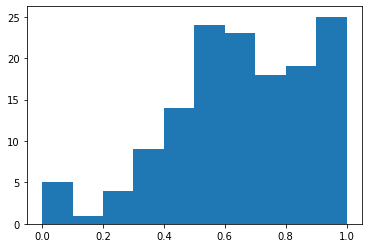

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(list(all_coherence))

In [45]:
contents['prediction'] = np.nan

In [46]:
AVG = 0.54

for i, row in enumerate(contents['cos_sim']):
    if(row>AVG):
        contents['prediction'][i] = int(1)
    else:
        contents['prediction'][i] = int(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

labels = contents.query('cos_sim.notnull()', engine='python')['tagging']
guesses = contents.query('cos_sim.notnull()', engine='python')['prediction']

print('정확도')
print(accuracy_score(labels, guesses))
print('재현율')
print(recall_score(labels, guesses))	
print('정밀도')
print(precision_score(labels, guesses))	
print('f1 score')
print(f1_score(labels, guesses))


정확도
0.5845070422535211
재현율
0.6181818181818182
정밀도
0.8
f1 score
0.6974358974358974


In [42]:
from sklearn.metrics import roc_auc_score
import numpy as np

labels_val = contents.query('cos_sim.notnull()', engine='python')['tagging']
guesses_val = contents.query('cos_sim.notnull()', engine='python')['cos_sim']

roc_score = roc_auc_score(labels_val, guesses_val)

roc_score

0.5410511363636363

In [43]:
import sklearn # for the roc curve
import matplotlib.pyplot as plt

def plot_roc(labels, predictions, positive_label, thresholds_every=10, title=''):
  # fp: false positive rates. tp: true positive rates
  fp, tp, thresholds = sklearn.metrics.roc_curve(labels, predictions, pos_label=positive_label)
  roc_auc = sklearn.metrics.auc(fp, tp)

  plt.figure(figsize=(16, 16))
  plt.plot(fp, tp, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=2, color='darkorange')
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=2)
  plt.xlabel('False positives rate')
  plt.ylabel('True positives rate')
  plt.xlim([-0.03, 1.0])
  plt.ylim([0.0, 1.03])
  plt.title(title)
  plt.legend(loc="lower right")
  plt.grid(True)

  # plot some thresholds
  thresholdsLength = len(thresholds)
  colorMap=plt.get_cmap('jet', thresholdsLength)
  for i in range(0, thresholdsLength, thresholds_every):
    threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
    plt.text(fp[i] - 0.03, tp[i] + 0.005, threshold_value_with_max_four_decimals, fontdict={'size': 15}, color=colorMap(i/thresholdsLength));
  plt.show()

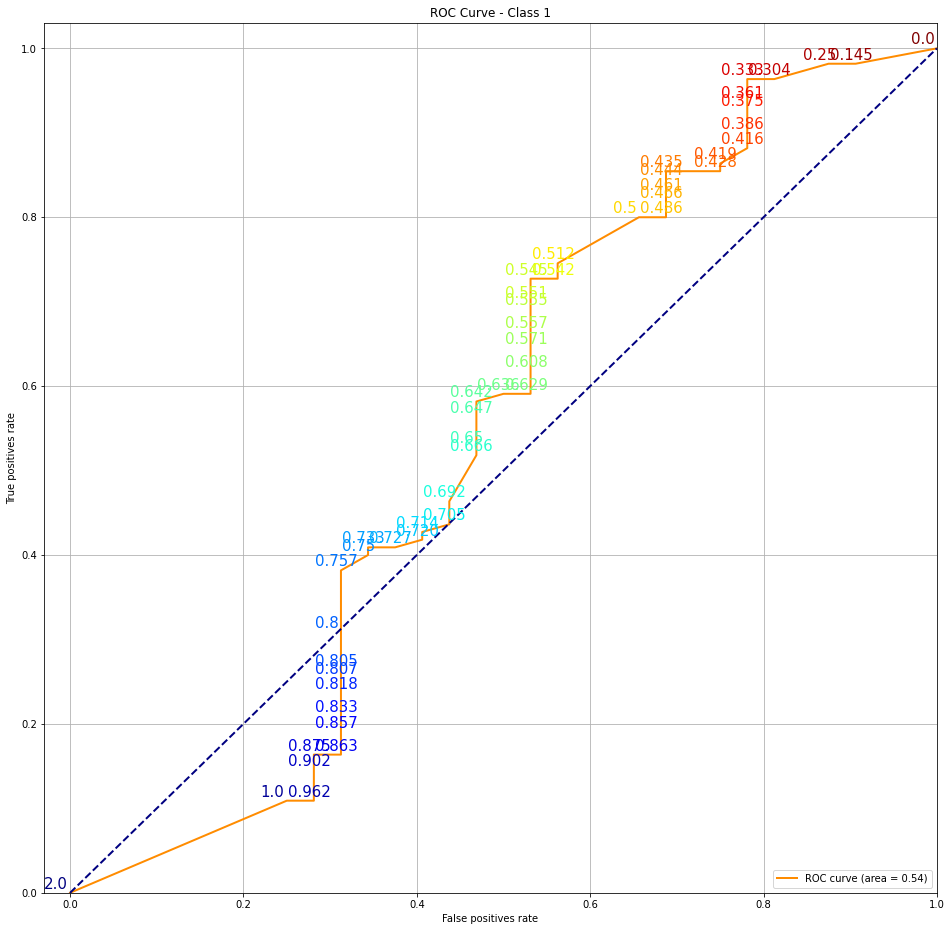

In [44]:
import matplotlib.pyplot as plt
from sklearn import metrics, svm
from sklearn.metrics import roc_curve

roc_data = roc_curve(labels_val, guesses_val)
plot_roc(labels_val, guesses_val, positive_label=1, thresholds_every=1, title="ROC Curve - Class 1")